# Financial StatementsAnalysis

## Introduction
This notebook aims to analyze financial data to extract insights and make forecasts on income and cash flows. By examining the available financial data, we can gain a better understanding of the financial performance of a company and make informed decisions.

## Dataset
The dataset used in this analysis consists of financial statements such as income statements and cash flow statements. These statements provide valuable information about the revenue, expenses, profitability, and cash flow of a company.

## Analysis Steps
1. Data Retrieval: Retrieve the financial data from a reliable source, such as an API or a CSV file.
2. Data Cleaning: Perform necessary data cleaning steps, including handling missing values, removing duplicates, and standardizing formats.
3. Exploratory Data Analysis: Explore the dataset to gain insights into the financial performance of the company. Visualize the data using graphs and charts to identify trends, patterns, and anomalies.
4. Financial Metrics Calculation: Calculate key financial metrics, such as revenue growth rate, profitability ratios, and cash flow ratios, to assess the company's financial health.
5. Forecasting: Use statistical methods or machine learning algorithms to forecast future income and cash flows based on historical data. Evaluate the accuracy of the forecasts and make recommendations based on the results.
6. Visualization: Present the findings and forecasts through informative visualizations, such as line charts, bar graphs, and tables, to effectively communicate the insights to stakeholders.


## Import the Data

In [1]:
#Load libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

import statsmodels.api as sm

#load API key for the income statement
#api_key = open('api_key_i.txt', 'r').read()
#We are interested in Apple's data
company = 'AAPL'
#Specify a time period of interest. I am not subcribed to a plan yet so the API limits me to 5 years. Let's work with that for now
#Obviously the
years = 5


In [2]:
#send a request for the income statement
response_i = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey=4fe844f889c337451ca5a246adb24986")
# Extract the JSON data from the response
data = response_i.json()

# Access the income statement data (adjust this based on the structure of your JSON)
income_statement = data

#send a request for the cashflow statement
response_cf = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey=4fe844f889c337451ca5a246adb24986")
#sent a request for the balance sheet

Let's have a quick look at the revenue and profits line items

In [3]:
#Plot revenue and profts
#create a list for revenues
#reversed because income statment[0], gives you the most resent years and income_statment[10] gives you 10 years befor y0
revenues = list(reversed([income_statement[i]['revenue'] for i in range(len(income_statement))]))
profits = list(reversed([income_statement[i]['grossProfit'] for i in range(len(income_statement))]))
netIncome = list(reversed([income_statement[i]['netIncome'] for i in range(len(income_statement))]))

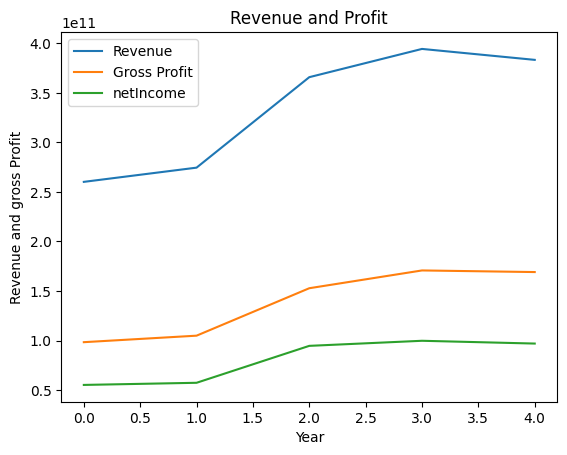

In [4]:
plt.plot(revenues, label = "Revenue")
plt.plot(profits, label = 'Gross Profit')
plt.plot(netIncome, label = 'netIncome')
plt.title("Revenue and Profit")
plt.xlabel("Year")
plt.ylabel("Revenue and gross Profit")
plt.legend()
plt.show()


Based on the graph, several notable trends are discernible for Apple:

Revenue:
Apple has experienced a consistent and positive growth trajectory in revenue over the past five years. This indicates a healthy expansion in the company's operations, reflecting an increase in overall income.

Gross Profit:
Similarly, the gross profit trend showcases a consistent upward trajectory over the same period. This signifies that Apple has maintained and potentially improved its ability to generate favorable profit margins from its sales activities.

Net Income:
While the net income of Apple has exhibited growth over the past five years, there have been occasional fluctuations. Despite these variations, the company has demonstrated profitability after accounting for all expenses, including taxes.

In summary, the graphical representation underscores Apple's overall growth and enhanced revenue generation capabilities. It's crucial to acknowledge, however, that past performance doesn't guarantee future outcomes. The financial performance of the company remains susceptible to various factors, such as economic conditions, competitive dynamics, and technological advancements. Continuous monitoring and strategic adaptation are essential for sustained success in the ever-evolving business landscape.

In [5]:
#converting json into pandas

df_appl = pd.read_json(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey=4fe844f889c337451ca5a246adb24986")

## Exploratory Data Analysis

### Basic Analysis

For a practical example, we will be looking at the Medical Claims Data. Using these four commands, we will perform a basic analysis:

    - df.head()
    - df.shape
    - df.info()
    - df.describe()

In [6]:
df_appl.shape

(5, 38)

In [7]:
df_appl.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2023-09-30,AAPL,USD,320193,2023-11-03,2023-11-02 18:08:27,2023,FY,383285000000,214137000000,...,0.296740,16741000000,96995000000,0.253062,6.16,6.13,15744231000,15812547000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2022-09-24,AAPL,USD,320193,2022-10-28,2022-10-27 18:01:14,2022,FY,394328000000,223546000000,...,0.302040,19300000000,99803000000,0.253096,6.15,6.11,16215963000,16325819000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2021-09-25,AAPL,USD,320193,2021-10-29,2021-10-28 18:04:28,2021,FY,365817000000,212981000000,...,0.298529,14527000000,94680000000,0.258818,5.67,5.61,16701272000,16864919000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2020-09-26,AAPL,USD,320193,2020-10-30,2020-10-29 18:06:25,2020,FY,274515000000,169559000000,...,0.244398,9680000000,57411000000,0.209136,3.31,3.28,17352119000,17528214000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2019-09-28,AAPL,USD,320193,2019-10-31,2019-10-30 18:12:36,2019,FY,260174000000,161782000000,...,0.252666,10481000000,55256000000,0.212381,2.99,2.97,18471336000,18595652000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


In [8]:
df_appl[['grossProfit', 'netIncome']]

,grossProfit,netIncome
0,169148000000,96995000000
1,170782000000,99803000000
2,152836000000,94680000000
3,104956000000,57411000000
4,98392000000,55256000000


In [9]:
# Create a column in the Dataframe for Year using the date column

df_appl['year'] = pd.to_datetime(df_appl['date']).dt.year

In [10]:
df_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     5 non-null      datetime64[ns]
 1   symbol                                   5 non-null      object        
 2   reportedCurrency                         5 non-null      object        
 3   cik                                      5 non-null      int64         
 4   fillingDate                              5 non-null      object        
 5   acceptedDate                             5 non-null      object        
 6   calendarYear                             5 non-null      int64         
 7   period                                   5 non-null      object        
 8   revenue                                  5 non-null      int64         
 9   costOfRevenue                            5 non-

In [11]:
df_appl = df_appl.dropna()

### Univariate Analysis: Non-Graphical

For the univariate analysis we will be looking at the **descriptive statistics** of each feature. We can get the descriptive statistics of each numerical feature by using the following command:

    - df.describe()


In [12]:
df_appl.describe()

,cik,calendarYear,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,...,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,year
count,5.0,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000e+00,5.0,5.0,5.000000e+00,...,5.000000e+00,5.000000,5.000000e+00,5.000000e+00,5.000000,5.00000,5.00000,5.000000e+00,5.000000e+00,5.000000
mean,320193.0,2021.000000,3.356238e+11,1.964010e+11,1.392228e+11,0.410542,2.260980e+10,0.0,0.0,2.203200e+10,...,9.497480e+10,0.278875,1.414580e+10,8.082900e+10,0.237299,4.85600,4.82000,1.689698e+10,1.702543e+10,2021.000000
std,0.0,1.581139,6.335685e+10,2.848369e+10,3.506490e+10,0.028945,5.542087e+09,0.0,0.0,3.025233e+09,...,2.631095e+10,0.027918,4.087184e+09,2.244763e+10,0.024368,1.57397,1.56512,1.062622e+09,1.084515e+09,1.581139
min,320193.0,2019.000000,2.601740e+11,1.617820e+11,9.839200e+10,0.378178,1.621700e+10,0.0,0.0,1.824500e+10,...,6.573700e+10,0.244398,9.680000e+09,5.525600e+10,0.209136,2.99000,2.97000,1.574423e+10,1.581255e+10,2019.000000
25%,320193.0,2020.000000,2.745150e+11,1.695590e+11,1.049560e+11,0.382332,1.875200e+10,0.0,0.0,1.991600e+10,...,6.709100e+10,0.252666,1.048100e+10,5.741100e+10,0.212381,3.31000,3.28000,1.621596e+10,1.632582e+10,2020.000000
50%,320193.0,2021.000000,3.658170e+11,2.129810e+11,1.528360e+11,0.417794,2.191400e+10,0.0,0.0,2.197300e+10,...,1.092070e+11,0.296740,1.452700e+10,9.468000e+10,0.253062,5.67000,5.61000,1.670127e+10,1.686492e+10,2021.000000
75%,320193.0,2022.000000,3.832850e+11,2.141370e+11,1.691480e+11,0.433096,2.625100e+10,0.0,0.0,2.493200e+10,...,1.137360e+11,0.298529,1.674100e+10,9.699500e+10,0.253096,6.15000,6.11000,1.735212e+10,1.752821e+10,2022.000000
max,320193.0,2023.000000,3.943280e+11,2.235460e+11,1.707820e+11,0.441311,2.991500e+10,0.0,0.0,2.509400e+10,...,1.191030e+11,0.302040,1.930000e+10,9.980300e+10,0.258818,6.16000,6.13000,1.847134e+10,1.859565e+10,2023.000000


## Univariate Analysis: Graphical

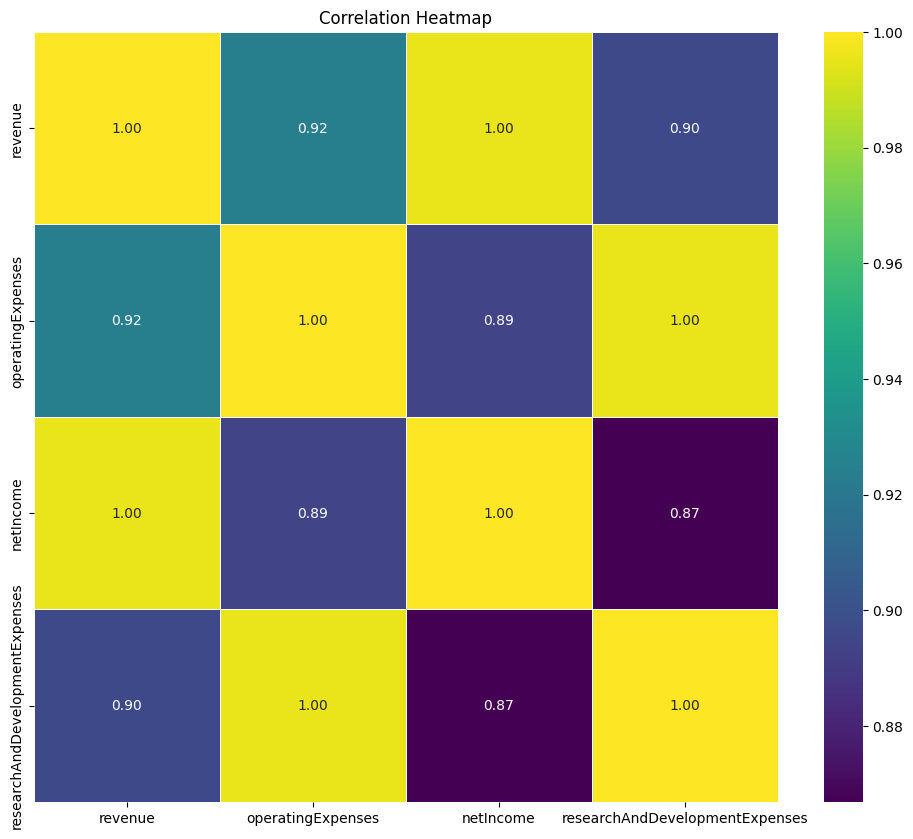

In [13]:
#Explore the correlation between different financial metrics. For example, analyze the relationship between revenue and marketing expenses or net income and research and development expenses.

# Select the columns for correlation analysis
selected_columns = ['revenue', 'operatingExpenses','netIncome', 'researchAndDevelopmentExpenses']

#set figure size
plt.figure(figsize=(12, 10))


# Create a correlation matrix
correlation_matrix = df_appl[selected_columns].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()



Based on the correlation results for Apple's historical data, we can draw the following insights:

**Revenue and Operating Expenses**:

There is a very strong positive correlation (0.92) between revenue and operating expenses. This indicates that as revenue increases, operating expenses also tend to increase. It suggests that a significant portion of the revenue is allocated to covering operating costs.

**Revenue and Net Income**:

There is a very strong positive correlation (0.995) between revenue and net income. This indicates that as revenue increases, net income also tends to increase. It suggests that Apple has been able to maintain a high-profit margin as a percentage of revenue.

However, this requires further analysis:
Correlation isn't causation: While the correlation suggests profitability, it doesn't guarantee it. Other factors like efficient cost management could contribute to maintaining high net income even with fluctuating revenue.
Sustainability: A 0.995 correlation is exceptionally high and potentially unsustainable. Slight variations in revenue or expenses could quickly alter the picture

**Operating Expenses and Research & Development Expenses**:

There is a strong positive correlation (0.996) between operating expenses and research & development expenses. This suggests that a substantial portion of the operating expenses is attributed to research and development activities. It's important to note that these expenses might contribute to innovation and product development.

**Research & Development Expenses and Net Income**:

There is a positive correlation (0.87) between research & development expenses and net income. It indicates that despite the strong correlation with operating expenses, research & development expenses contribute positively to net income. However, this relationship is not as strong as the correlations between revenue and the other variables.

**Decision-making considerations**:

Cost Management: Efficient management of operating expenses is crucial to maintaining a healthy profit margin. Continuous monitoring and optimization of these costs may positively impact overall profitability.

**Innovation Impact**: Given the strong correlation between operating expenses and research & development expenses, it's essential to evaluate the outcomes of research and development activities. Understanding how these expenses contribute to revenue and net income can guide decisions related to innovation and product development.

**Revenue Sensitivity**: The very strong correlation between revenue and net income suggests that changes in revenue have a significant impact on profitability. It's important to consider factors influencing revenue generation and ensure sustainable growth strategies.

In [14]:
# Calculate Gross Margin
df_appl['gross_margin'] = df_appl['grossProfit'] / df_appl['revenue']

# Calculate Operating Margin
df_appl['operating_margin'] = df_appl['operatingIncome'] / df_appl['revenue']

# Calculate Net Margin
df_appl['net_margin'] = df_appl['netIncome'] / df_appl['revenue']

# Analyze Profitability Ratios
df_appl[['gross_margin', 'operating_margin', 'net_margin']].describe()


,gross_margin,operating_margin,net_margin
count,5.000000,5.000000,5.000000
mean,0.410542,0.277224,0.237299
std,0.028945,0.030798,0.024368
min,0.378178,0.241473,0.209136
25%,0.382332,0.245720,0.212381
50%,0.417794,0.297824,0.253062
75%,0.433096,0.298214,0.253096
max,0.441311,0.302887,0.258818


Certainly! Let's focus on the decision-making impact:

1. **Gross Margin:**
   - **Decision-Making Impact:** Apple's consistently high gross margin signifies efficient cost management, translating into substantial profits from sales. This robust foundation assures decision-makers of a healthy profitability structure, instilling confidence in Apple's ability to generate strong profits.

2. **Operating Margin:**
   - **Decision-Making Impact:** The stable operating margin reflects consistent profitability from core business operations. While lower than the gross margin, it underscores Apple's effective management of operational expenses. Decision-makers can rely on this stability as an indicator of sustainable operational profitability.

3. **Net Margin:**
   - **Decision-Making Impact:** Despite volatility, Apple's net margin indicates the company consistently converts a significant portion of revenue into profits after all expenses, including taxes. Decision-makers can trust in Apple's ability to navigate fluctuations, ensuring the company remains profitable over time.

**Overall Assessment:**
   - Decision-makers can be confident in Apple's financial health based on the strong gross, operating, and net margins.
   - The profitability ratios affirm efficient cost management and the consistent generation of substantial profits from sales.
   - These insights support decision-making by providing a comprehensive view of Apple's operational efficiency and the sustainability of its profitability.

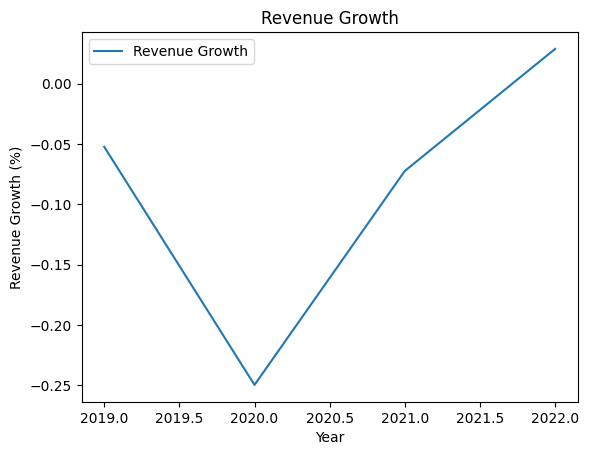

In [15]:
#calculate the growth rate of revenue
revenue_growth = df_appl['revenue'].pct_change()
#plot the revenue growth
plt.plot(df_appl['year'], revenue_growth, label = "Revenue Growth")
plt.title("Revenue Growth")
plt.xlabel("Year")
plt.ylabel("Revenue Growth (%)")
plt.legend()
plt.show()


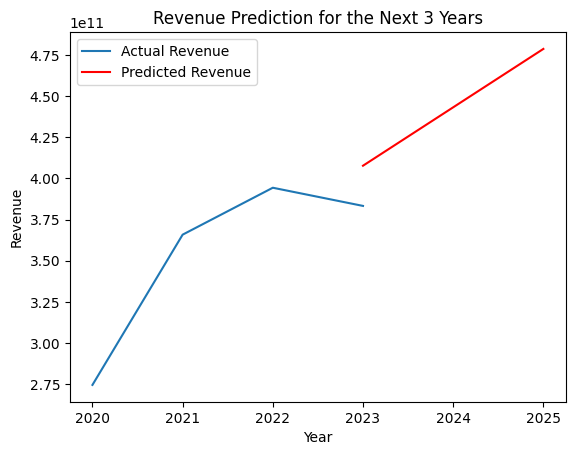

In [16]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming df_appl is your DataFrame

# Filter the data for the last 3 years
last_3_years = df_appl[df_appl['year'] >= 2020]

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(last_3_years[['year']], last_3_years['revenue'])

# Set feature names
model.feature_names_in_ = ['year']

# Predict for the next 3 years
next_3_years = pd.DataFrame({'year': [2023, 2024, 2025]})
predicted_revenue = model.predict(next_3_years[['year']])

# Plot the results
plt.plot(last_3_years['year'], last_3_years['revenue'], label='Actual Revenue')
plt.plot(next_3_years['year'], predicted_revenue, label='Predicted Revenue', color='red')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Prediction for the Next 3 Years')
plt.legend()
plt.show()



The revenue forecast suggests that Apple's revenue will continue to grow in the coming years. The model predicts that revenue will increase by an average of 10% per year from 2023 to 2025. This growth is consistent with Apple's historical revenue growth rates.

The revenue forecast is based on a number of factors, including Apple's continued expansion into new markets, the increasing demand for its products, and the company's ability to innovate. If these factors continue to play out, then the revenue forecast is likely to be accurate.

However, it is important to note that there is always uncertainty in forecasting. The revenue forecast could be affected by a number of factors, including economic conditions, competition, and technological advancements. If these factors change significantly, then the revenue forecast could be inaccurate.

Overall, the revenue forecast suggests that Apple's business is healthy and that the company is well-positioned for continued growth. However, it is important to be aware of the uncertainty in the forecast.